## All Imports for the script

In [1]:
import h2o
import seaborn as sns
import pandas as pd
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
import warnings
warnings.filterwarnings('ignore')

In [2]:
# CONSTANT DECLARATIONS
ORD_WEATHER_DATA_PATH = "C://repository/h2o_project/h2o_data/Chicago_Ohare_International_Airport.csv"
ORD_AIRPORT_DATA_PATH = "C://repository/h2o_project/h2o_data/allyears2k.csv"

## Initiating h2o instance

In [3]:
h2o.init(max_mem_size="1G")

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.201-b09, mixed mode)
  Starting server from c:\programdata\miniconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\retim\AppData\Local\Temp\tmpkbghcwqe
  JVM stdout: C:\Users\retim\AppData\Local\Temp\tmpkbghcwqe\h2o_retim_started_from_python.out
  JVM stderr: C:\Users\retim\AppData\Local\Temp\tmpkbghcwqe\h2o_retim_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/Denver
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,"21 days, 8 hours and 34 minutes"
H2O cluster name:,H2O_from_python_retim_zsa989
H2O cluster total nodes:,1
H2O cluster free memory:,989 Mb
H2O cluster total cores:,6
H2O cluster allowed cores:,6
H2O cluster status:,"accepting new members, healthy"


## 1. import data Chicago weather and Airline dataset

In [4]:
# weather Data Set
weather_df = h2o.import_file(ORD_WEATHER_DATA_PATH)

# Airline Data Set
airline_df = h2o.import_file(ORD_AIRPORT_DATA_PATH)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


### 2. Transform Weather data's Date column to three new columns "Year", "Month", "DayofMonth"

In [5]:
# h2o library to extract year from the date
weather_df["Year"]= weather_df['Date'].year()

# h2o library to extract month from the date
weather_df["Month"]= weather_df['Date'].month()

# h2o library to extract day from the date
weather_df["DayofMonth"]= weather_df['Date'].day()

In [6]:
#ohare_df = ohare_df.drop('Date')
weather_df.head(5)

Date,TmaxF,TminF,TmeanF,PrcpIn,SnowIn,CDD,HDD,GDD,Year,Month,DayofMonth
2005-01-01 00:00:00,41,25,33,0.31,0,0,32,0,2005,1,1
2005-01-02 00:00:00,54,33,43.5,0.08,0,0,21.5,0,2005,1,2
2005-01-03 00:00:00,36,32,34,0.36,0,0,31,0,2005,1,3
2005-01-04 00:00:00,35,30,32.5,0.05,1.2,0,32.5,0,2005,1,4
2005-01-05 00:00:00,31,26,28.5,0.38,6.2,0,36.5,0,2005,1,5


### 4. Question: What is the range of the Year column in weather dataset?

In [7]:
# year range in weather data
print( "weather data year range and nrows for each year: ")
print(weather_df["Year"].table())


weather data year range and nrows for each year: 


Year,Count
2005,365
2006,365
2007,365
2008,366


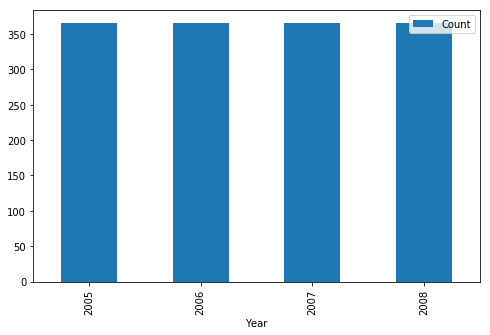

In [8]:
import matplotlib.pyplot as plt
weather_df["Year"].table().as_data_frame().plot(x = "Year", 
                                                y = "Count", 
                                                kind = "bar",
                                               figsize = (8,5))
plt.show()

### 3. Question: What is the range of the Year column in airlines dataset?

In [9]:
# checking unique year in the dataframe
print ("Total unique years in the dataframe: {}".format(airline_df["Year"].table().shape[0]))

Total unique years in the dataframe: 22


In [10]:
# lets check out all 22 
print( "airline data year range and nrows for each year: ")
print (airline_df["Year"].table().head(22))

airline data year range and nrows for each year: 


Year,Count
1987,1999
1988,1999
1989,1999
1990,1999
1991,1999
1992,1999
1993,1999
1994,1999
1995,1999
1996,1999


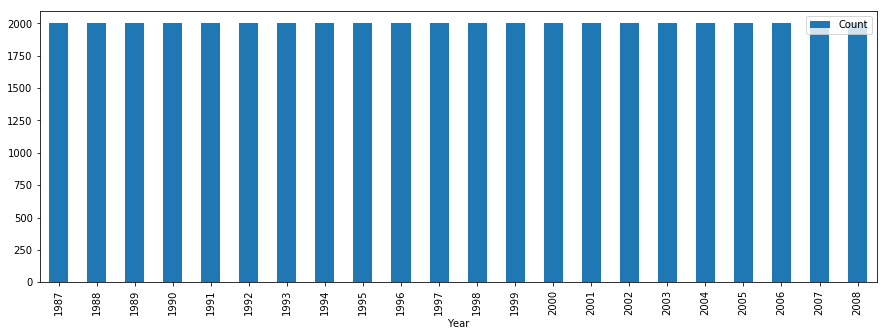

In [33]:
airline_df["Year"].table().as_data_frame().plot(x = "Year", 
                                                y = "Count", 
                                                kind = "bar", 
                                                figsize = (15, 5)
                                               )
plt.show()

### 5. Filter airlines data to only flights outgoing or incoming to Chicago, ORD.

In [11]:
# data frame with only "ORD" as origin or departure
ord_only_df = airline_df [(airline_df['Origin'] == 'ORD')|(airline_df['Dest'] == 'ORD')]

In [12]:
# checking if there are decent number of data points
ord_only_df.shape

(4349, 31)

In [13]:
# checking unique year in the dataframe
ord_only_df['Year'].table().shape[0]

10

In [14]:
# lets take a look at all 10 unique years and their counts
ord_only_df['Year'].table().head(10)

Year,Count
1989,1054
1991,6
1994,84
1995,237
2001,27
2002,31
2003,770
2004,1053
2005,1031
2006,56


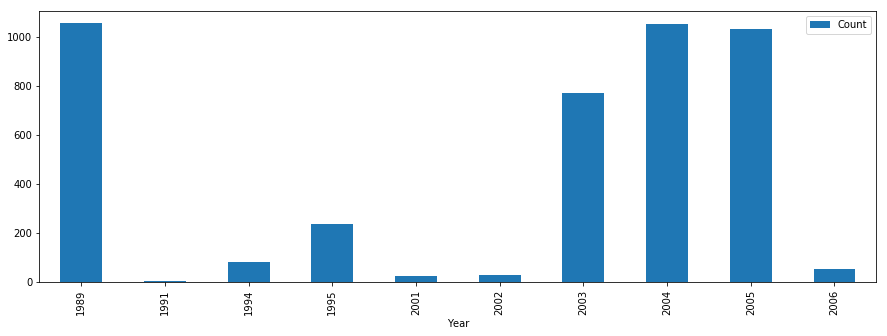

In [15]:
ord_only_df['Year'].table().as_data_frame().plot(x = "Year", 
                                                y = "Count", 
                                                kind = "bar", 
                                                figsize = (15, 5)
                                               )
plt.show()

### 6. Run a join of the two frames as you see fit, specify in the comments if you ran an outer left, outer right, or inner join.

Noticed that only 2005 and 2006 are the common year in both data frame to join with weather data to get any meaningful predictions

In [16]:
## only has 2 years in common in both dataframe
common_years = [2005,2006]

## filter only common years from airline data of ORD
ord_only_df_from_05 = ord_only_df[ord_only_df['Year'].isin(common_years)]

## filter only common years from weather data
ohare_df_from_05 = weather_df[weather_df['Year'].isin(common_years)]

print (ord_only_df_from_05.shape)

(1087, 31)


In [17]:
# before merging checking which columns are common in both dataframe to merge on
print ("merging are possible in following columns: {} ".format([x for x in ord_only_df.columns if x in weather_df.columns]))

merging are possible in following columns: ['Year', 'Month', 'DayofMonth'] 


#### Full outer join on Year, Month, DayofMonth

In [18]:
ord_only_df_ohare_df = ord_only_df_from_05.merge(ohare_df_from_05)

print (ord_only_df_ohare_df.shape)

(1087, 40)


In [19]:
ord_only_df_ohare_df.head(5)

DayofMonth,Year,Month,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed,Date,TmaxF,TminF,TmeanF,PrcpIn,SnowIn,CDD,HDD,GDD
1,2005,1,6,1704,1715,1919,1915,UA,543,N203UA,195,180,144,4,-11,BOS,ORD,867,13,38,0,,0,0,0,0,0,0,YES,NO,2005-01-01 00:00:00,41,25,33,0.31,0,0,32,0
1,2005,1,6,2220,2045,119,2359,UA,544,N325UA,119,134,103,80,95,ORD,BOS,867,2,14,0,,0,58,0,0,0,22,YES,YES,2005-01-01 00:00:00,41,25,33,0.31,0,0,32,0
1,2005,1,6,1841,1810,2041,2010,UA,545,N325UA,180,180,135,31,31,BOS,ORD,867,16,29,0,,0,10,0,0,0,21,YES,YES,2005-01-01 00:00:00,41,25,33,0.31,0,0,32,0
1,2005,1,6,2342,2115,151,2319,UA,546,N386UA,69,64,42,152,147,ORD,DAY,240,7,20,0,,0,7,0,5,0,140,YES,YES,2005-01-01 00:00:00,41,25,33,0.31,0,0,32,0
1,2005,1,6,831,835,1034,1052,UA,547,N427UA,183,197,164,-18,-4,MIA,ORD,1197,7,12,0,,0,0,0,0,0,0,NO,NO,2005-01-01 00:00:00,41,25,33,0.31,0,0,32,0


In [22]:
ord_only_df_ohare_df.describe()

Rows:1087
Cols:40




,DayofMonth,Year,Month,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed,Date,TmaxF,TminF,TmeanF,PrcpIn,SnowIn,CDD,HDD,GDD
type,int,int,int,int,int,int,int,int,enum,int,enum,int,int,int,int,int,enum,enum,int,int,int,int,enum,int,int,int,int,int,int,enum,enum,time,int,int,real,real,real,int,real,int
mins,1.0,2005.0,1.0,1.0,10.0,600.0,1.0,442.0,,1.0,,51.0,64.0,37.0,-36.0,-15.0,,,177.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,,1104537600000.0,11.0,1.0,6.5,0.0,0.0,0.0,17.0,0.0
mean,15.240110395584177,2005.0515179392823,1.0,3.8960441582336705,1315.770955165692,1302.2069917203312,1340.7685546875,1455.1609935602576,,574.2364305427783,,149.5908203125,147.15823367065317,122.2470703125,22.2109375,20.40448343079922,,,834.9788408463661,6.122355105795768,19.679852805887766,0.05611775528978841,,0.0018399264029438822,5.597976080956761,0.24287028518859247,9.460901563937442,0.0,8.776448942042318,,,1107392615271.3892,32.3836246550138,19.30358785648574,25.84360625574977,0.15729910714285714,0.9994577006507592,0.0,39.15639374425023,0.0
maxs,31.0,2006.0,1.0,7.0,2354.0,2315.0,2400.0,2359.0,,1698.0,,364.0,282.0,277.0,399.0,369.0,,,1829.0,49.0,165.0,1.0,,1.0,369.0,59.0,285.0,0.0,253.0,,,1137024000000.0,62.0,38.0,48.0,0.89,6.2,0.0,58.5,0.0
sigma,8.909424066040309,0.22115342082690095,0.0,2.0313502820986646,546.7496891715926,518.2950982447303,627.0912182757576,564.8986095454788,,127.53132081028397,,60.86577667294583,56.595856395585784,58.22619535252697,50.216894548000134,45.70530352292981,,,474.92094380727735,4.624055004839375,15.811638391828057,0.2302549170392227,,0.04287460996600146,22.982003439383288,2.728656035714888,26.975469524968634,0.0,27.803087475996204,,,6933394784.585629,11.155977203518843,11.026663482550894,10.458697732206552,0.22185521434773653,1.806547907134282,0.0,10.458697732206552,0.0
zeros,0,0,0,0,0,0,0,0,,0,,0,0,0,23,62,,,0,63,61,1026,,1085,924,1074,832,1087,912,,,0,0,0,0,320,553,1087,0,1087
missing,0,0,0,0,61,0,63,0,0,0,0,63,0,63,63,61,0,0,0,0,0,0,1026,0,0,0,0,0,0,0,0,0,0,0,0,191,165,0,0,0
0,1.0,2005.0,1.0,6.0,1704.0,1715.0,1919.0,1915.0,UA,543.0,N203UA,195.0,180.0,144.0,4.0,-11.0,BOS,ORD,867.0,13.0,38.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,YES,NO,2005-01-01 00:00:00,41.0,25.0,33.0,0.31,0.0,0.0,32.0,0.0
1,1.0,2005.0,1.0,6.0,2220.0,2045.0,119.0,2359.0,UA,544.0,N325UA,119.0,134.0,103.0,80.0,95.0,ORD,BOS,867.0,2.0,14.0,0.0,,0.0,58.0,0.0,0.0,0.0,22.0,YES,YES,2005-01-01 00:00:00,41.0,25.0,33.0,0.31,0.0,0.0,32.0,0.0
2,1.0,2005.0,1.0,6.0,1841.0,1810.0,2041.0,2010.0,UA,545.0,N325UA,180.0,180.0,135.0,31.0,31.0,BOS,ORD,867.0,16.0,29.0,0.0,,0.0,10.0,0.0,0.0,0.0,21.0,YES,YES,2005-01-01 00:00:00,41.0,25.0,33.0,0.31,0.0,0.0,32.0,0.0


#### To check correlation between data 

In [18]:
## change into pandas
pd_df = ord_only_df_ohare_df.as_data_frame()

pandas.core.frame.DataFrame

In [19]:
# quick checking the information that data leaks into the model

ord_only_df_ohare_df[['DepTime', 'CRSDepTime','ArrTime','CRSArrTime','ArrDelay','DepDelay','IsArrDelayed','IsDepDelayed']]

DepTime,CRSDepTime,ArrTime,CRSArrTime,ArrDelay,DepDelay,IsArrDelayed,IsDepDelayed
1704,1715,1919,1915,4,-11,YES,NO
2220,2045,119,2359,80,95,YES,YES
1841,1810,2041,2010,31,31,YES,YES
2342,2115,151,2319,152,147,YES,YES
831,835,1034,1052,-18,-4,NO,NO
1303,1205,1435,1329,66,58,YES,YES
2257,2300,415,445,-30,-3,NO,NO
951,945,1104,1055,9,6,YES,YES
1213,1215,1344,1353,-9,-2,NO,NO
741,740,925,905,20,1,YES,YES


In [20]:
print(ord_only_df_ohare_df['WeatherDelay'].table().shape)
print (ord_only_df_ohare_df['WeatherDelay'].table().head(13))

(13, 2)


WeatherDelay,Count
0,1074
5,1
8,1
9,1
10,1
13,1
14,1
17,1
20,1
21,1


The varaible 'WeatherDelay' is imbalanced and classification are not clear so not best varible to make the response

In [21]:
print(ord_only_df_ohare_df['IsArrDelayed'].table().shape)
print (ord_only_df_ohare_df['IsArrDelayed'].table())

(2, 2)


IsArrDelayed,Count
NO,447
YES,640


The varaible 'IsArrDelayed' is fairly balanced and classification are clear thus, could be used as response variable.

In [22]:
print(ord_only_df_ohare_df['IsDepDelayed'].table().shape)
print (ord_only_df_ohare_df['IsDepDelayed'].table())

(2, 2)


IsDepDelayed,Count
NO,545
YES,542


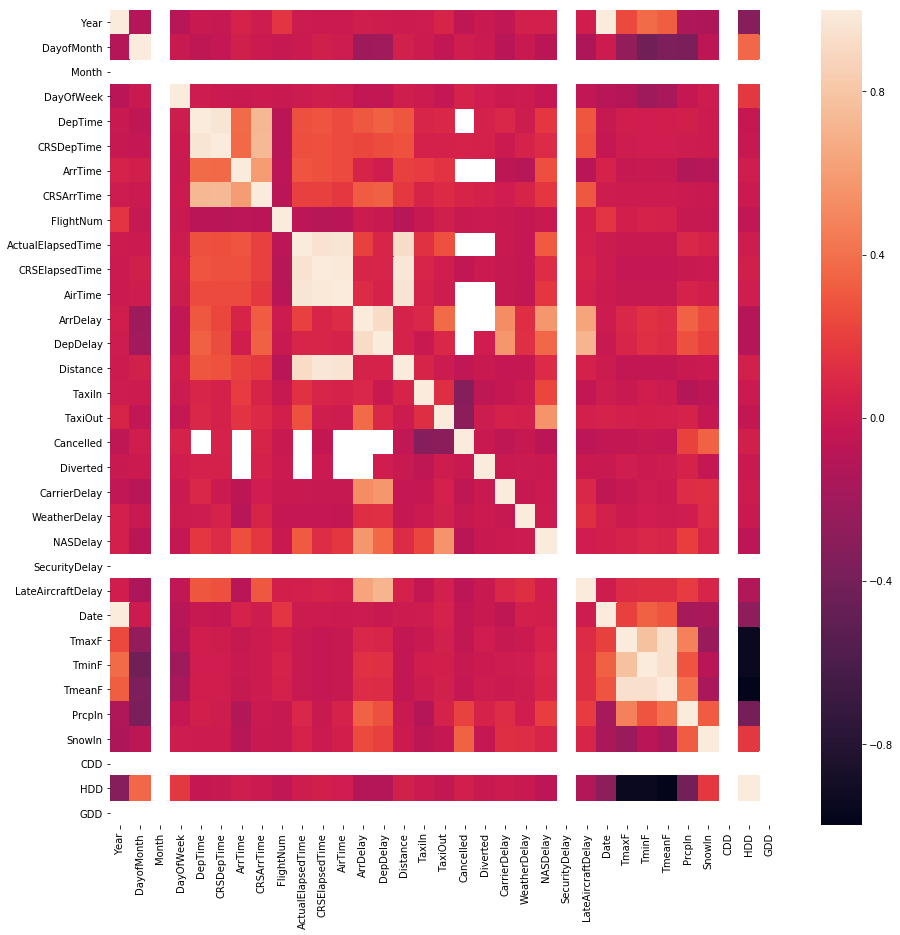

In [51]:
import seaborn as sns
corr = ord_only_df_ohare_df.as_data_frame().corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
           )
plt.show()

The variable 'IsDepDelayed' is fairly balanced and classification are clear thus, could be used as response variable.
<br>
Final information of this data flow ends with arrival to its destination, this is a good candidate to be target variable.

# Variable declaration

In [25]:
# remove variable are correlated variables and also variable that are available only after the fact the flight is already taken place
# wouldnt be avaiable if we want to predict the delay 

remove =['IsArrDelayed','IsDepDelayed', 'WeatherDelay','DepTime', 'ArrTime','ArrDelay','DepDelay',
          'IsArrDelayed','IsDepDelayed','ActualElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay',
         'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
         'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

cat_features = ['DayofMonth', 'Month', 'Year', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 
                'UniqueCarrier', 'FlightNum', 'TailNum', 'Origin', 'Dest']

num_features = ['CRSElapsedTime','Distance','TmaxF', 'TminF', 'TmeanF', 'PrcpIn', 
                'SnowIn','CDD','HDD', 'GDD']

predictors = [x for x in ord_only_df_ohare_df.columns if x not in remove]

target = 'IsArrDelayed'

In [26]:
ord_only_df_ohare_df[target]= ord_only_df_ohare_df[target].asfactor()


# for x in num_features:
#     ord_only_df_ohare_df[x] = ord_only_df_ohare_df[x].asnumeric()
# for x in cat_features:
#     ord_only_df_ohare_df[x] = ord_only_df_ohare_df[x].asfactor() 

In [27]:
len(remove)

23

In [28]:
#ord_only_df_ohare_df.describe()

# Building the GLM model

In [29]:
 # spliting the data
train, valid = ord_only_df_ohare_df.split_frame([0.8], seed=1234)

In [48]:
glm_model = H2OGeneralizedLinearEstimator(family= "binomial", 
                                          lambda_ = 0, 
                                          remove_collinear_columns = True,
                                          compute_p_values = True,
                                          seed =1234)
glm_model.train(predictors, 
                target , 
                training_frame = train,
                validation_frame = valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [53]:
glm_model._model_json['output']['coefficients_table']

Coefficients: glm coefficients



names,coefficients,std_error,z_value,p_value,standardized_coefficients
Intercept,-10.8979011,26.0966686,-0.4175974,0.6762415,1.6914891
TailNum.-N913<0xE5>,0.0,nan,nan,nan,0.0
TailNum.-N918<0xE5>,0.0,nan,nan,nan,0.0
TailNum.-N919<0xE5>,0.0,nan,nan,nan,0.0
TailNum.-N920<0xE5>,0.0,nan,nan,nan,0.0
---,---,---,---,---,---
TminF,0.0436745,0.0222872,1.9596252,0.0500396,0.4830778
TmeanF,0.0,nan,nan,nan,0.0
PrcpIn,4.1503523,1.0333550,4.0163856,0.0000591,0.9391703
SnowIn,0.3104995,0.1218902,2.5473699,0.0108538,0.5610915



See the whole table with table.as_data_frame()


In [54]:
# model auc on training set
glm_model.auc(valid = False)

0.9364759602471124

In [55]:
# model auc on validation set
glm_model.auc(valid = True)

0.6558570198105081

### 8. Provide some insight on the resulting model which can be a classification or regression model.

Model is over fitted (model captured the noise of the training data) as we can see AUC on the training set is high whereas <br>
the validation AUC significantly low, comparatively. We can avoid this by training the model on more data. Model needs to <br>
be built with optimal hyper parameters which can be achieve by performing grid search.  

In [47]:
## code below we can download confusion matrix and other computed statistic from the h2oflow itself and save it as pandas dataframe 
## we can create custom function to calculate our own error rates

tt = glm_model._model_json["output"]["validation_metrics"]['thresholds_and_metric_scores'].as_data_frame()
tt.head(5)

,threshold,f1,f2,f0point5,accuracy,precision,recall,specificity,absolute_mcc,min_per_class_accuracy,mean_per_class_accuracy,tns,fns,fps,tps,tnr,fnr,fpr,tpr,idx
0,1.0,0.129496,0.085551,0.266272,0.447489,0.900000,0.069767,0.988889,0.138248,0.069767,0.529328,89.0,120.0,1.0,9.0,0.988889,0.930233,0.011111,0.069767,0
1,1.0,0.154930,0.103970,0.303867,0.452055,0.846154,0.085271,0.977778,0.131277,0.085271,0.531525,88.0,118.0,2.0,11.0,0.977778,0.914729,0.022222,0.085271,1
2,1.0,0.153846,0.103774,0.297297,0.447489,0.785714,0.085271,0.966667,0.104462,0.085271,0.525969,87.0,118.0,3.0,11.0,0.966667,0.914729,0.033333,0.085271,2
3,1.0,0.165517,0.112782,0.310881,0.447489,0.750000,0.093023,0.955556,0.091845,0.093023,0.524289,86.0,117.0,4.0,12.0,0.955556,0.906977,0.044444,0.093023,3
4,1.0,0.164384,0.112570,0.304569,0.442922,0.705882,0.093023,0.944444,0.068893,0.093023,0.518734,85.0,117.0,5.0,12.0,0.944444,0.906977,0.055556,0.093023,4


In [56]:
#h2o.cluster().shutdown()

H2O session _sid_be86 closed.


#### below was EDA on table to explore more on data leakage. 

In [48]:
# df = airport_df[['IsArrDelayed', 'IsDepDelayed']]
# print ('Total size',df.shape)

# print ('when both arrival and departure are same', df[(df['IsArrDelayed']==df['IsDepDelayed'])].shape,
#        '\n' 'when both delayed',df[(df['IsArrDelayed']=='YES') & (df['IsDepDelayed']=='YES')].shape,
#        '\n' 'when arrival not delayed and departure delayed',df[(df['IsArrDelayed']=='NO') & (df['IsDepDelayed']=='YES')].shape,
#        '\n' 'when arrival delayed and departure not delayed',df[(df['IsArrDelayed']=='YES') & (df['IsDepDelayed']=='NO')].shape)